<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Numerical Integration of Differential Equations
# Damped Harmonic Oscillators

Tobias Fox<br>
University of Manchester
April 2022

This project will use numerical integrators to study the properties of a spring-mass system under varying conditions.

The displacement of a spring-mass system will be calculated using each method under the conditions that no force is applied to the system. Then, by calculating the energy over time for various step sizes and comparing it to the analytical results the accuracy of each method can be determined.

Next, to show the effects of damping on a system the damping constant will be changed so that it is half the critical damping, the critical damping and double the critical damping and the displacement calculated using the most accurate method in the previous section.

Then the displacement of the system will be calculated, using the most accurate method, for a mass-spring system that has a force applied to it. The types of force applied will be an instantaneous force, a more-realistic force over time and an oscillating force. Finally, to investigate resonance, the frequency of the oscillating force will be varied close to the natural frequency and the amplitude plotted as a function of frequency.

In [30]:
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import cmath
from fractions import Fraction

SPRING_CONSTANT = 0.62 #Kg/s**2
MASS = 5.06 #kg

FUNCTION_TITLE = ["Euler Method", "Improved Euler Method", "Verlet Method", "Euler-Cromer Method"]

# Defining Numerical Integration Methods

This section defines four numerical integration methods as functions, it will take in the start conditions and output the displacement and velocity at each time step. It also defines a function that will calculate the displacement at each time step using an analycal method, further on this will be used to compare the accuracy of each method. 

Defining Euler's method.

In [31]:
def eulers_method(start_conditions, k=SPRING_CONSTANT, m=MASS):
    
    #Unpacks the start conditions.
    
    x_start, v_start, time_period, h, b = start_conditions
    
    #Performs Euler's method and returns the time intervals, displacement and velocity for each time interval.
    
    #Calcualtes the number of iterations the method needs to repeat over that time period and creates an array
    #containing increasing time steps.
    
    iterations = int(time_period / h)    
    t = np.linspace(0, time_period, iterations)
    
    #Creates an empty array for the displacement and velocity to be stored
        
    x = ([x_start])
    v = ([v_start])
    
    #Iterates Euler's method and stores the results in the arrays.
    
    for i in range(iterations-1):
    
        a = - (k / m) * x[i] - (b / m) * v[i]
        
        x = np.append(x, x[i] + h * v[i])
        v = np.append(v, v[i] + h * a)
        
    #Returns the arrays containing the time steps, displacment and velocity.
           
    return t, x, v

Defining improved Euler's method.

In [32]:
def improved_eulers_method(start_conditions, k=SPRING_CONSTANT, m=MASS):
    
    #Unpacks the start conditions.
    
    x_start, v_start, time_period, h, b = start_conditions
    
    #Performs improved Euler's method and returns the time intervals, displacement and velocity for each time interval.
    
    #Calcualtes the number of iterations the method needs to repeat for over that time period and creates an array
    #containing increasing time steps.
    
    iterations = int(time_period / h)    
    t = np.linspace(0, time_period, iterations)
    
    #Creates an empty array for the displacement and velocity to be stored
        
    x = ([x_start])
    v = ([v_start])
    
    #Iterates improved Euler's method and store the results in the arrays.
    
    for i in range(iterations-1):
    
        a = - (k / m) * x[i] - (b / m) * v[i]
        
        x = np.append(x, x[i] + h * v[i] + h**2 / 2*a)
        v = np.append(v, v[i] + h * a)
        
    #Returns the arrays containing the time steps, displacement and velocity.
                               
    return t, x, v

Defines Verlet's method.

In [33]:
def verlet_method(start_conditions, k=SPRING_CONSTANT, m=MASS):
    
    #Unpacks the start conditions.

    x_start, v_start, time_period, h, b = start_conditions
    
    #Performs Verlet's method and returns the time intervals, displacement and velocity for each time interval.
    
    #Calcualtes the number of iterations the method needs to repeat over that period and creates an array
    #containing increasing time steps.
    
    iterations = int(time_period / h)    
    t = np.linspace(0, time_period, iterations)
    
    #Creates an empty array for the displacement and velocity to be stored and performs Euler's method for the first step of storing
    #it in the array.
    
    a_start = - (k / m) * x_start - (b / m) * v_start
    x = ([x_start, x_start + h * v_start])
    v = ([v_start, v_start + h * a_start])
    
    #Defines the constants A, B and D.
    
    D = 2*m + b*h
    A = 2 * (2*m - k*h**2) / D
    B = (b*h - 2*m) / D
    
    #Iterates Verlet's method and stores the results in the arrays, the for loop starts at 1 as the first step has 
    #has already been calculated.

    for i in range(1, iterations-1):
        
        x = np.append(x, A * x[i] + B * x[i-1])   
        v = np.append(v, (x[i+1] - x[i-1]) / (2 * h))
        
    #Returns the arrays containing the time steps, displacement and velocity.
        
    return t, x, v

Defines Euler-Cromer's method.
This method also allows the addition of an applied force, which is used futher on in the project.

In [34]:
def euler_cromer_method(start_conditions, k=SPRING_CONSTANT, m=MASS):
    
    #Unpacks the start conditions, adding a zero array for the force is no force is given.
    
    if len(start_conditions) != 6:
        x_start, v_start, time_period, h, b = start_conditions
        F = np.zeros((int(time_period / h)))
        
    else:
        x_start, v_start, time_period, h, b, F = start_conditions
    
    
    #Performs Euler-Cromer's method with a force applied and returns the time intervals,
    #displacement and velocity for each time interval.
    
    #Calcualtes the number of iterations the method needs to repeat over that time period and creates an array
    #containing increasing time steps.
    
    iterations = int(time_period / h)
    t = np.linspace(0, time_period, iterations)
    
    #Creates an empty array for the displacement and velocity to be stored.
    
    x = ([x_start])
    v = ([v_start])
    
    #Iterates Euler-Cromer's method and stores the results in the arrays, this includes the added terms for both damping
    #and the force when calculating the velocity.
    
    for i in range(0, iterations-1):
        
        v = np.append(v, v[i] - ((h * k) / m) * x[i] - ((h * b) / m) * v[i] + ((F[i] * h) / m))
        x = np.append(x, x[i] + h * v[i+1])
        
    #Returns the arrays containing the time steps, displacement and velocity.
                               
    return t, x, v

Defines an analytical method to calculate the displacement. When using the analytical results, the start conditions affect how the displacement is calculated, this function determines whether the damping is more, less or equal to the critical damping and uses a different method for each situation.

In [35]:
def analytical(start_conditions, k=SPRING_CONSTANT, m=MASS):
    
    #Unpacks the start conditions.
    
    x_start, v_start, time_period, h, b = start_conditions
    
    #Calculates the analytical result for the oscillation and returns the time intervals and the displacement for each
    #time interval. 
    
    #Calcualtes the number of iterations the method needs to repeat for over that period and creates an array
    #containing increasing time steps.
    
    iterations = int(time_period / h)    
    t = np.linspace(0, time_period, iterations)
    
    #Calcualtes the gamma factor and the critical damping
    
    gamma, b_cr = b / m, np.sqrt(4 * k * m)
    
    #Uses and if statement to determine whether the damping is more, less or equal to the critical damping.
    
    #Calculates the analytical result for weak damping.
    
    if b < b_cr:
        
        alpha = cmath.sqrt(b_cr**2 - b**2) / (2 * m)
        
        A = ((-gamma * 1j * alpha) / 4 + 1 / 2) * x_start - (1j / (2 * alpha)) * v_start
        B = x_start - A
        
        x = np.exp((-gamma * t) / 2) * (A * np.exp (alpha * t * 1j) + B * np.exp (-alpha * t * 1j))
        
    #Calculates the analytical result for critical damping.
        
    elif b == b_cr:
        
        alpha = 0
        
        A = x_start
        B = v_start + (A * gamma) / 2
        
        x = A * np.exp((-gamma * t) / 2) + B * t * np.exp((-gamma * t) / 2)
        
    #Calculates the analytical result for heavy damping.
        
    else:
        
        alpha = cmath.sqrt(b**2 - b_cr**2) / (2 * m)
        
        A = v_start / (2 * alpha) + x_start * (gamma / (4 * alpha) + (1 / 2))
        B = x_start - A
        
        x = np.exp((-gamma * t) / 2) * (A * np.exp(alpha * t) + B * np.exp(-alpha * t))
        
    #Returns the arrays containing the time steps and the displacement, only returning the real displacement.
    
    return t, (x).real

This defines a function which allows the user to input start conditions and chooses a function to use, this is used to make iteration of functions easier further on in the code.

In [36]:
def function_chooser(start_conditions, function_number):
       
    if function_number == 0:
    
        return eulers_method(start_conditions) 
        
    elif function_number == 1:      
        
        return improved_eulers_method(start_conditions)
    
    elif function_number == 2:
        
        return verlet_method(start_conditions) 
    
    elif function_number == 3:
        
        return euler_cromer_method(start_conditions)
    
    elif function_number == 4:
        
        return analytical(start_conditions)

Defines a function which will iterate through each method and plots the displacement over time for the given start conditions and plots the analyitcal results for comparison on each graph.

In [37]:
def method_plotter(start_conditions):
    
    fig = plt.figure(figsize=(10, 7))
    plot_array = fig.subplots(2, 2)
    
    anayl_time, anayl_displacement = function_chooser(start_conditions, 4)
    
    #Iterates the graph plotting for 4 subplots, each subplot contains the results of a method and the analytical result.
        
    for array_count, plots in enumerate(plot_array):
        
        for count, subplot in enumerate(plots):
            
            if array_count == 0 and count == 1:
                function_number = 2
            if array_count == 1 and count == 0:
                function_number = 3
            else:
                function_number = array_count + count
                
            func_time, func_displacement, func_velocity = function_chooser(start_conditions, function_number)

            subplot.plot(func_time, func_displacement, 'r', label="Numerical")
            subplot.plot(anayl_time, anayl_displacement, 'k', label="Analytical")    
            subplot.set_xlabel("t (s)")
            subplot.set_ylabel("x (m)")
            subplot.set_title(FUNCTION_TITLE[function_number])
            subplot.legend()
            subplot.grid()
            subplot.set_xlim(0, start_conditions[2])
    
    plt.tight_layout()
    plt.show()

Defines functions which calculate the total energy over time using the results of the chosen method and calculates the total energy over time using an analytical method.

In [38]:
def numerical_energy_function(start_conditions, function_number, k=SPRING_CONSTANT, m=MASS):
    
    #Calculates the total energy of the oscillation at a given time interval for a chosen method.
    
    function_time, function_displacement, function_velocity = function_chooser(start_conditions, function_number)
    
    #Uses E = 1/2*m*v^2 + 1/2*k*x^2 to calculate the total energy at each time step.
    
    total_energy_numerical = 1/2 * m * function_velocity**2 + 1/2 * k * function_displacement**2
    
    #Returns the arrays containing the time steps and total energy.
        
    return function_time, total_energy_numerical

def analytical_energy_function(start_conditions, function_number, k=SPRING_CONSTANT, m=MASS):
    
    #Calculates the total energy of the oscillation at a given time interval analytically.
    
    time, displacement = function_chooser(start_conditions, function_number)
    
    #Calculates the gamma factor
    
    gamma = start_conditions[4] / m
    
    #Creates an array to store the total energy, storing the initial energy which is calculated using E = 1/2*m*v^2 + 1/2*k*x^2
    
    total_energy_anayltical = ([1/2 * m * start_conditions[1]**2 + 1/2 * k * start_conditions[0]**2])
    
    for i in range(1, len(time)):
        
        #Using E = E_0 * exp[-gamma * t] to calculate the total energy at each time step and appends to an array.
        
        next_energy_step = total_energy_anayltical[0] * np.exp(-gamma * time[i])
        total_energy_anayltical = np.append(total_energy_anayltical, next_energy_step)
        
    #Returns the arrays containing the time steps and total energy.
        
    return time, total_energy_anayltical

Defines a function which will iterate through each method and plots the energy over time and plots the analytical results for comparison on each graph.

In [39]:
def energy_plots(start_conditions):
    
    #Plots the total energy over time for the given start conditions, using each method to calculate the results and
    #plotting the analytical results for comparison on each graph.
    
    fig = plt.figure(figsize=(10, 7))
    plot_array = fig.subplots(2, 2)
    
    time, anayl_energy = analytical_energy_function(start_conditions, 4)
    
    #Iterates the graph plotting for 4 subplots, each subplot contains the results of a method.
        
    for array_count, plots in enumerate(plot_array):
        
        for count, subplot in enumerate(plots):
            
            if array_count == 0 and count == 1:
                function_number = 2
            if array_count == 1 and count == 0:
                function_number = 3
            else:
                function_number = array_count + count
                
            time, func_energy = numerical_energy_function(start_conditions, function_number)

            subplot.plot(time, func_energy, 'r', label="Numerical")
            subplot.plot(time, anayl_energy, 'k', label="Analytical") 
            subplot.set_xlabel("t (s)")
            subplot.set_ylabel("E (J)")
            subplot.set_title(FUNCTION_TITLE[function_number])
            subplot.legend()
            subplot.grid()
            subplot.set_xlim(0, start_conditions[2])
            subplot.set_ylim(0, np.max(func_energy)*1.1)
    
    plt.tight_layout()
    plt.show()

# Investigate the effect of the varying time step, h.

Below, the code plots both the displacement and energy over time for each method against the analytical solutions for varying step sizes. By doing this, it can be seen how the results of each method how to compare to the analytical results as step size varies. 

The energy plot is used to compare the methods to the analytical results because it is easier to compare to either a straight line or an exponential decay of energy than to compare oscillations between the method results and the analytical results. As seen below even though the oscillations may seem fairly similar when plotting energy over time there is a difference between each method and the analytical result.

Plots the displacement over time for a time step of 1s and no damping.

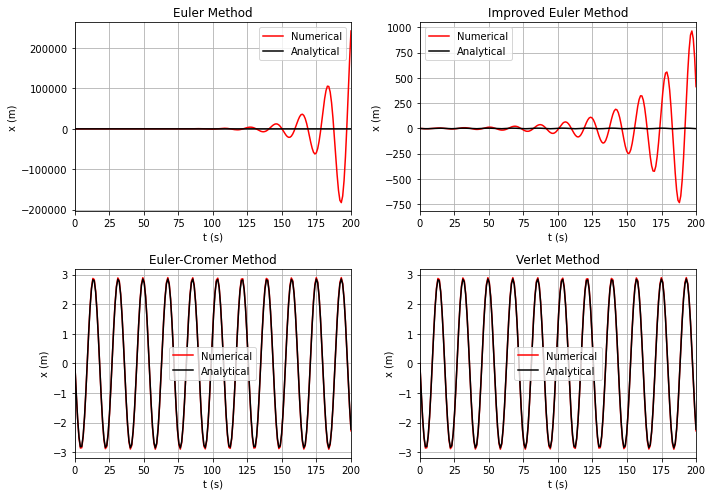

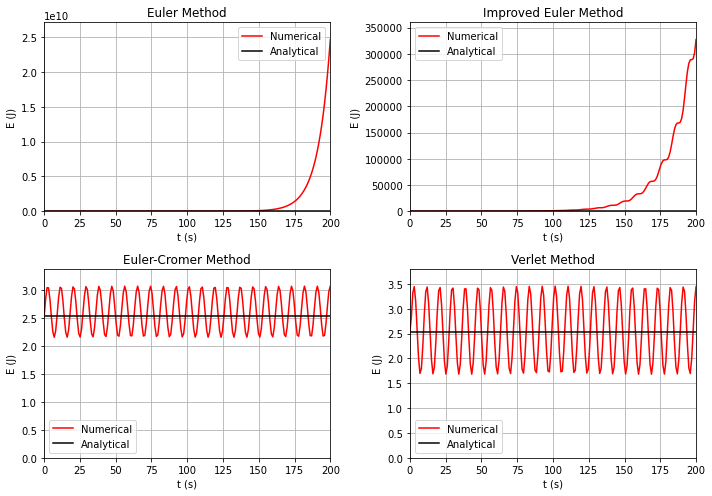

In [40]:
#Defines the start conditions

x_start = 0 # m
v_start = -1 # m/s
time = 200 # s
b = 0 #Kg/s

time_step = 1.0 # s

#Packs the start conditions into an array.
    
start_conditions = ([x_start, v_start, time, time_step, b])

method_plotter(start_conditions)
energy_plots(start_conditions)

Plots the displacement over time for a time step of of 0.1s and no damping.

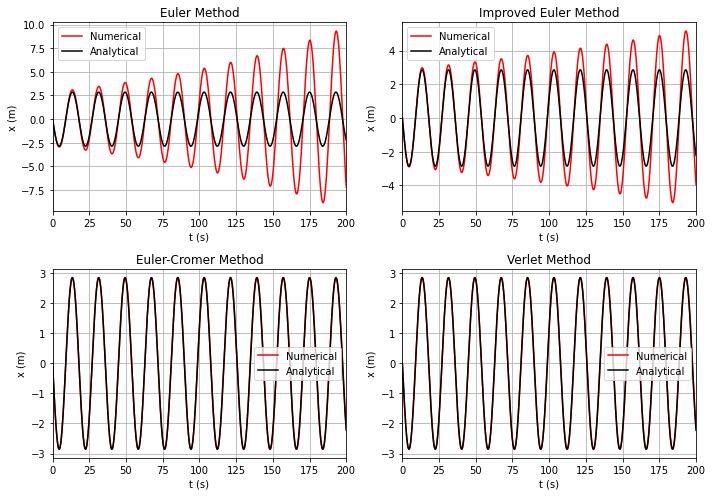

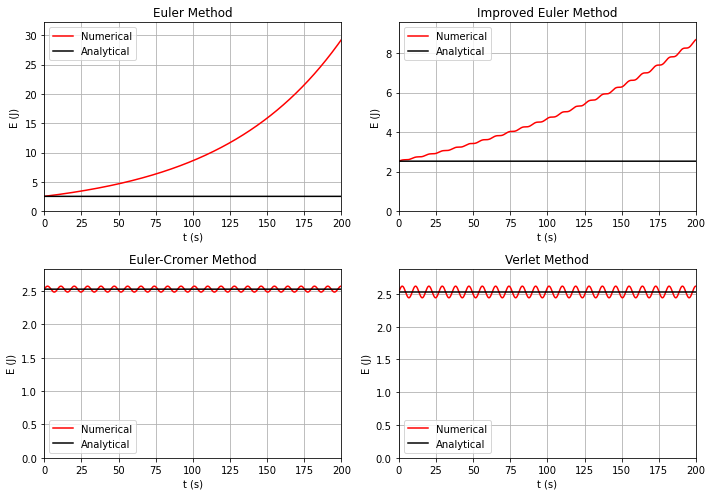

In [41]:
time_step = 0.1 #s

#Packs the start conditions into an array with the new time step.

start_conditions = ([x_start, v_start, time, time_step, b])  

method_plotter(start_conditions)
energy_plots(start_conditions)

Plots the displacement over time for a time step of 0.01s and no damping.

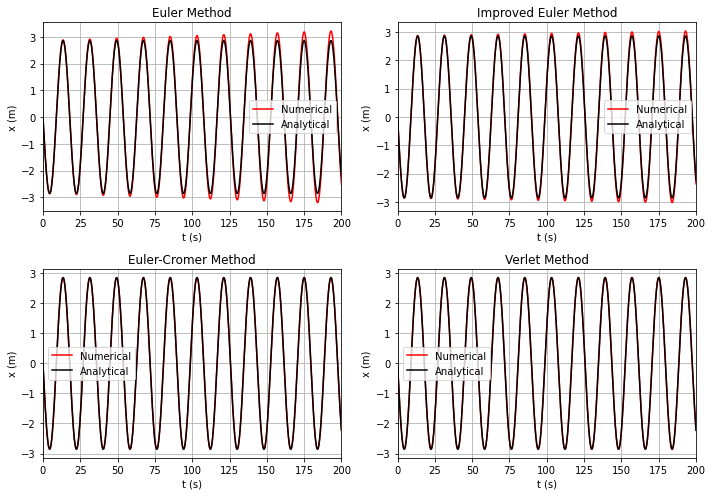

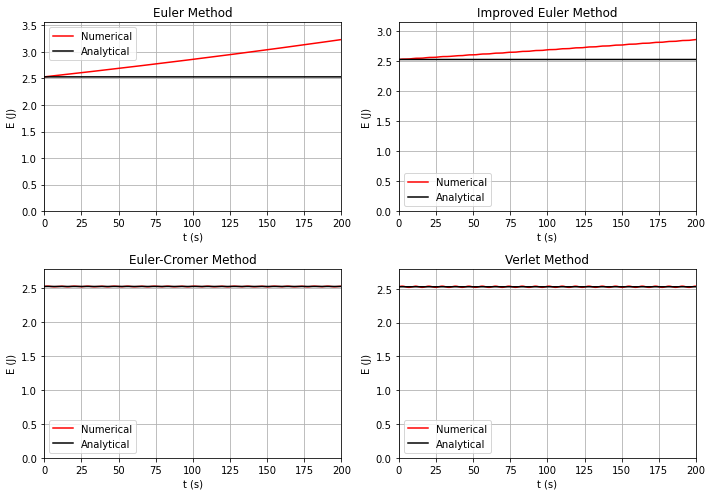

In [42]:
time_step = 0.01 #s

#Packs the start conditions into an array with the new time step.
    
start_conditions = ([x_start, v_start, time, time_step, b])    

method_plotter(start_conditions)
energy_plots(start_conditions)

Plots the displacement over time for a time step of 1s and weak damping.

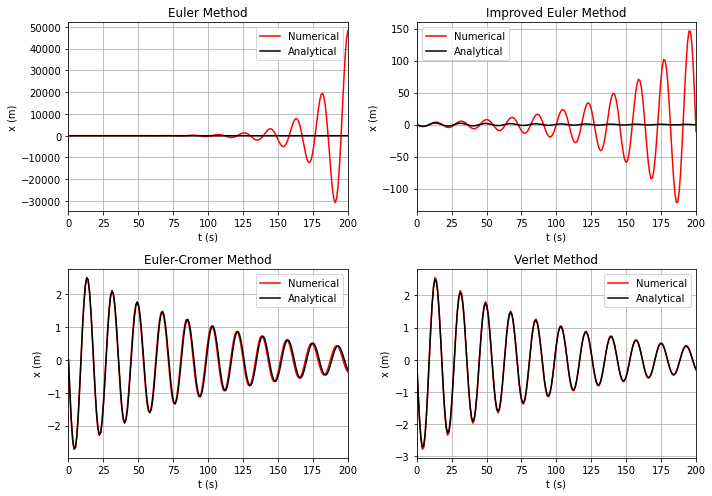

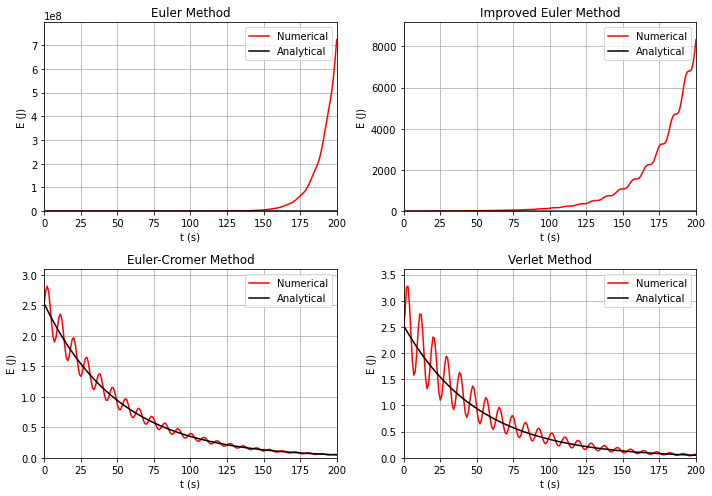

In [43]:
#Defines the start conditions

x_start = 0 # m
v_start = -1 # m/s
time = 200 # s
b = 0.1 #Kg/s

time_step = 1.0 # s

#Packs the start conditions into an array.
    
start_conditions = ([x_start, v_start, time, time_step, b])

method_plotter(start_conditions)
energy_plots(start_conditions)

Plots the displacement over time for a time step of 0.1s and weak damping.

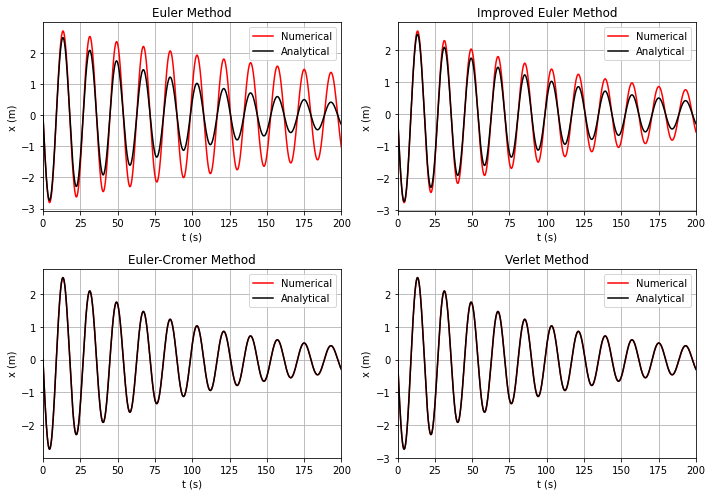

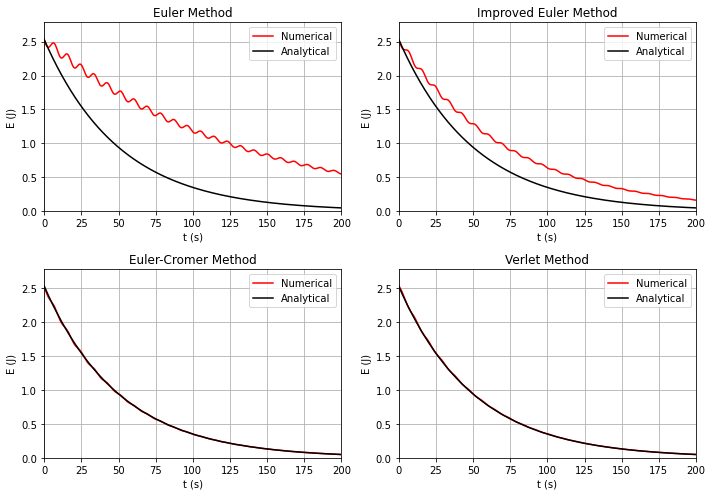

In [44]:
time_step = 0.1 #s

#Packs the start conditions into an array with the new time step.
    
start_conditions = ([x_start, v_start, time, time_step, b])    

method_plotter(start_conditions)
energy_plots(start_conditions)

Plots the displacement over time for a time step of 0.01s and weak damping.

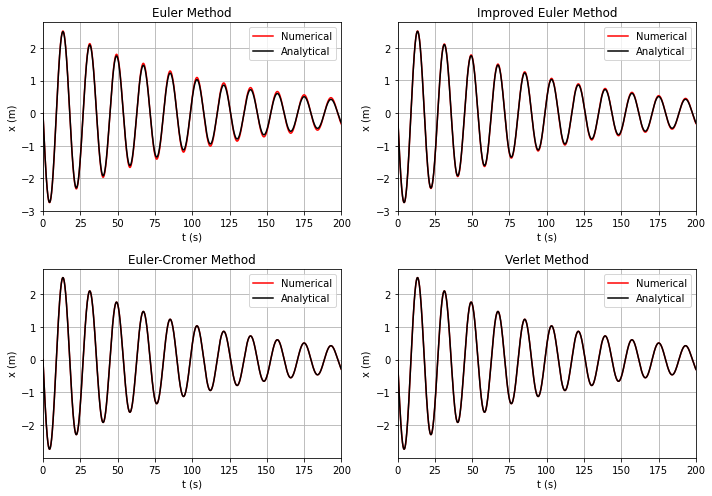

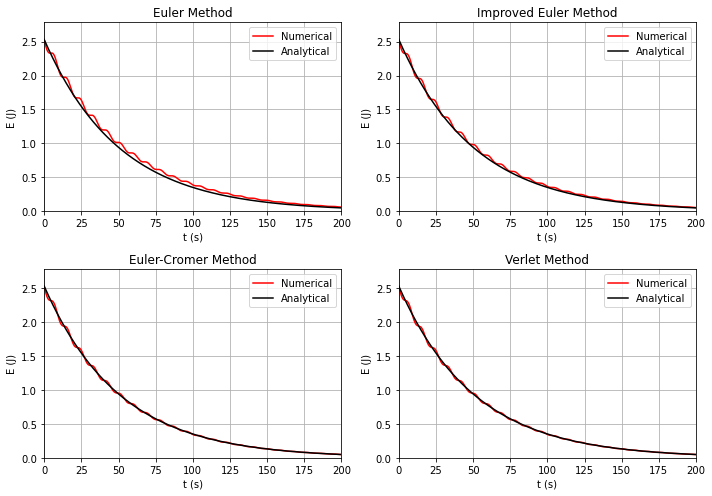

In [45]:
time_step = 0.01 #s

#Packs the start conditions into an array with the new time step.
    
start_conditions = ([x_start, v_start, time, time_step, b])    

method_plotter(start_conditions)
energy_plots(start_conditions)

From the plots above, it can be seen that the Euler-Cromer's method has the most accurate results compared to the analytical plot over a range of time steps and for no damping and weak damping. 

Euler's method and improved Euler's method both don't conserve energy as seen by the energy graphs above. Both have an increase in energy over time for larger time steps and it doesn't decrease as fast as expected for the smallest time steps, which as we know for an isolated system it should either conserve energy if there is no damping or decrease with damping. This is to be expected as both methods are not symplectic integrators, meaning it is not energy-preserving.

Both Euler-Cromer's and Verlet's methods conserve energy over time for varying time steps at zero damping and decay at a similar rate for weak damping. However, Euler-Cromer's method is more accurate when compared to the analytical results as it has a smaller variation at larger time steps in comparison to Verlet's method.

# Critical Damping

Defines a function which plots the displacement over time for varying damping using Euler-Cromer's method, which was found to be the most accurate in the previous section. There are four plots, no damping, half the critical damping, the critical damping and double the critical damping.

In [46]:
def critical_damping_plots(start_conditions, k=SPRING_CONSTANT, m=MASS):
    
    #Plots the displacement overtime for no damping, half critical damping, critical damping, double critical damping
    #using each method to calculate the results and plotting the analytical results for comparison on each graph.
    
    #Defines the critical damping
    
    b_cr = np.sqrt(4 * k * m)
        
    fig = plt.figure(figsize=(10, 7))
    plot_array = fig.subplots(2, 2)
    
    title = ["Zero Damping", "Half Critical Damping", "Critical Damping", "", "Double Critical Damping"]
    
    #Iterates the graph plotting for 4 subplots, each subplot contains the results of the start conditions using Euler's method.
        
    for array_count, plots in enumerate(plot_array):
        
        for count, subplot in enumerate(plots):
            
            if array_count == 1 and count == 0:
                fraction = 2
            else:
                fraction = (array_count+count) / 2
                
            #Changes the damping constant of the start conditions to either no damping, half critical damping, critical damping,
            #double critical damping
                
            start_conditions[4] = b_cr * fraction

            anayltical_time, anayltical_displacement = analytical(start_conditions)
            func_time, func_displacement, func_velocity = verlet_method(start_conditions)

            subplot.plot(func_time, func_displacement, 'r', label="Numerical")
            subplot.plot(anayltical_time, anayltical_displacement, 'k', label="Analytical") 
            subplot.set_xlabel("Time, t (s)")
            subplot.set_ylabel("Displacement, x (m)")
            subplot.set_title(title[int(fraction*2)])
            subplot.legend()
            subplot.grid()
            subplot.set_xlim(0, start_conditions[2])
    
    plt.tight_layout()
    plt.show()

Plots four graphs with different damping constants.

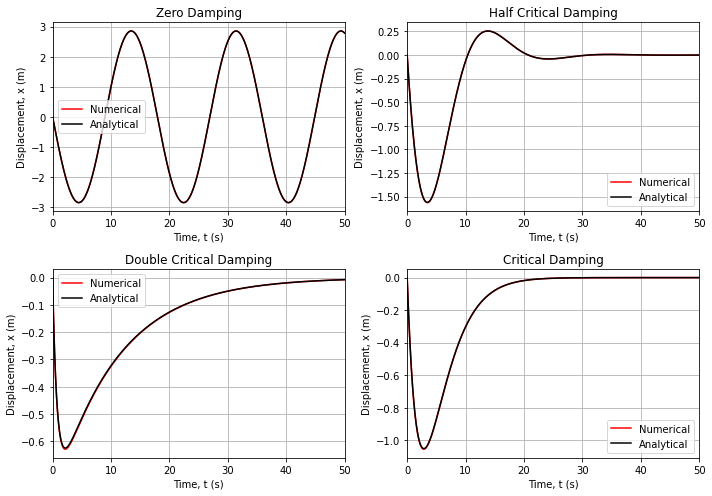

In [47]:
#Defines the start conditions
#A smaller time of oscillation was chosen as the effects of the changing damping constant occur soon after the 
#oscillation begins.

x_start = 0 # m
v_start = -1 # m/s
time = 50 # s

time_step = 0.01 # s

#Packs the start conditions into an array.
    
start_conditions = ([x_start, v_start, time, time_step, b])

critical_damping_plots(start_conditions)

When the system has no damping, it will oscillated with a constant amplitude as no energy is lost from the system. When there When the system has no damping, it will oscillate with a constant amplitude as no energy is lost from the system. When there is half the critical damping, the system oscillates but the amplitude of the system decreases rapidly until it reaches the equilibrium and the vibration will stop. As seen in the graph above this happens in just over one cycle of the system, this is to be expected as the damping is weak damping, less than the critical damping. When the damping is double the critical damping, heavy damping, the system does not complete a full cycle and returns to the equilibrium at a decaying exponential rate. However, the rate at which it decays is slower than for critical damping, this is because when there is critical damping the system will return to equilibrium in the shortest time without oscillating, as seen in the graphs above.

#  "A push"

In this section, I will be investigating the effects of applying a force to an oscillating mass-spring system.

For this, I will be plotting the displacement over time for the cases where an instantaneous force is applied after some time, a more-realistic force over time again after some time and an oscillating force applied constantly throughout. For the force over time, I have to input a force which varies over time using a gaussian distribution to predict the behaviour.

Finally, I will be seeing the effects of varying the frequency of an oscillating force on the amplitude of the oscillation.

In [48]:
def guassian_equation(x, A, mu, sigma):
    
    #Equation for a guassian curve
    
    return A * np.exp(-np.float64((x - mu)**2) / (2*sigma**2))

Defines a function that applies an instantaneous force to Euler-Cromer's method.

In [49]:
def instantaneous_force(int_force, start_conditions, cycle_number, fraction_of_cycle, k=SPRING_CONSTANT, m=MASS):
    
    #Unpacks the start conditions.

    x_start, v_start, time_period, h, b = start_conditions
    gamma = b / m
    
    #Creates an array containing the force for each time interval, for an instantaneous force it is a zero array with
    #one element is the force which is at the time interval for each quarter fraction of a random cycle.
    
    cycle_length = (2 * np.pi) / cmath.sqrt((k / m) - (b / (2*m))**2).real
    time_of_push = cycle_length * cycle_number + cycle_length * (fraction_of_cycle)
    
    force = np.zeros((int(time_period / h)))
    force[int(time_of_push / h)] = int_force
    
    #Packs the start conditions into an array containing the force array.
    
    force_start_conditions = x_start, v_start, time_period, h, b, force
    
    #Calculates the displacement and velocity for each time interval using Euler's method which is called using the 
    #function chooser.
    
    t, x, v = function_chooser(force_start_conditions, 3)
    
    #Returns the arrays containing the time steps, displacement, velocity and the time the push occurred.
    
    return t, x, v, time_of_push

Defines a function that applies a force over time to Euler-Cromer's method, the force as a function of time is calculated using a gaussian distribution.

In [50]:
def force_dist(max_force, time_of_push, time_period_of_force, h, time_period):
    
    #Calcalates the mean and standard deviation of a gaussian distribution for the force.
    #The mean is the time of the push.
    #The standard deviation is 1/6 the time the force occurs meaning the time of force happens in a 3 sigma range so where 99.7%
    #of the force would be assumed to occur.
    
    mu, sigma = time_of_push, time_period_of_force / 6
    time = np.linspace(0, 200, int(time_period / h))
    
    #Creates an array of the force for each time interval using a gaussian distribution to calculate the force per interval.
    
    force = guassian_equation(time, max_force, mu, sigma)            
    force[np.where(force<0.1)] = 0
    
    #Returns an array containing the force.
    
    return force

def force_over_time(max_force, time_period_of_force, start_conditions, cycle_number, fraction_of_cycle,
                    k=SPRING_CONSTANT, m=MASS):
    
    #Unpacks the start conditions.
    
    x_start, v_start, time_period, h, b = start_conditions
    gamma = b / m
    
    #Creates an array containing the force for each time interval, it is a zero array at most points except the time
    #period the force occurs.
    
    cycle_length = (2 * np.pi) / cmath.sqrt((k / m) - (b / (2*m))**2).real    
    time_of_push = cycle_length * cycle_number + cycle_length * (fraction_of_cycle)
    
    force = force_dist(max_force, time_of_push, time_period_of_force, h, time_period)
    
    #Packs the start conditions into an array containing the force array.
    
    force_start_conditions = x_start, v_start, time_period, h, b, force
    
    #Calculates the displacement and velocity for each time interval using Euler's method which is called using the 
    #function chooser.
    
    t, x, v = function_chooser(force_start_conditions, 3)
    
    #Returns the arrays containing the time steps, displacement, velocity and the time the push occurred.
    
    return t, x, v, time_of_push

Defines a function which plots the displacement over time for an oscillation that has a force applied at some time. Also, this function determines whether it is an instantanous force or a force over time, plotting the respective results depending on the start conditions.

In [51]:
def force_plotter(force, time_period_of_force, start_conditions):
    
    #Plots the displacement over time for Euler's method with a force being applied at a particular part of an interval.
    
    fig = plt.figure(figsize=(10, 7))
    plot_array = fig.subplots(2, 2)
    
    #Iterates the graph plotting for 4 subplots, each subplot contains the results of the force being applied at certain parts
    #of a cycle.
    
    #Using randint to generate the number of cycles to start the push
    
    cycle_number = random.randint(1, 5)
    
    for array_count, plots in enumerate(plot_array):
        
        for count, subplot in enumerate(plots):
            
            if array_count == 1 and count == 0:
                fraction = 3/4
            else:
                fraction = (array_count+count) / 4
                
            #This if statement determines if the force is an instantaneous force or a realistic force that occurs over a 
            # period.
            
            if time_period_of_force == 0:                
                time, displacement, velocity, time_of_push = instantaneous_force(force, start_conditions, cycle_number,
                                                                                 fraction)
            else:
                time, displacement, velocity, time_of_push = force_over_time(force, time_period_of_force, start_conditions,
                                                                             cycle_number, fraction)

            subplot.plot(time, displacement, 'r', label="Numerical")
            subplot.axvline(x=time_of_push, color='k')
            subplot.set_xlabel("Time, t (s)")
            subplot.set_ylabel("Displacement, x (m)")
            subplot.set_title("Force after several periods at a "+str(Fraction(fraction))+" of a cycle")
            subplot.text(time_of_push, 0, "Force applied", rotation='vertical', horizontalalignment='right',
                         verticalalignment='center')
            subplot.grid()
            subplot.set_xlim(0, start_conditions[2])
    
    plt.tight_layout()
    plt.show()

Plots of the displacement over time of an oscillation, with an instantaneous force applied after some time at different parts of a cycle.

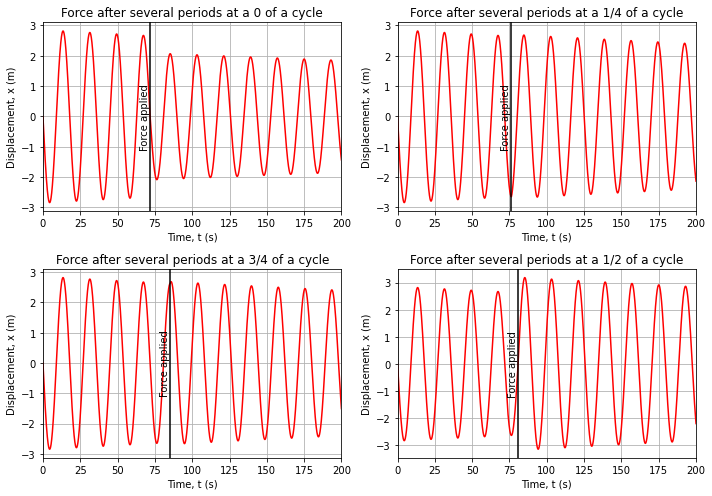

In [52]:
#Defines the start conditions

x_start = 0 #m
v_start = -1 #m/s
time = 200 #s
time_step = 0.01 #s
b = 0.01 #Kg/s

#Packs the start conditions into an array

start_conditions = ([x_start, v_start, time, time_step, b])

#Defines the force and time of force, for an instantaneous force the time of the force is 0s.
#I a large force of 100 N to make the effects of the force on the oscillation clearer.

force = 100 #N
time_period_of_force = 0 #s
    
force_plotter(force, time_period_of_force, start_conditions)

The application of an instantaneous force at the start of a cycle causes a large decrease in amplitude, this happens because the force is applied in the opposite direction to velocity causing it to reduce. When applied 1/2 of a cycle, the amplitude increases, this is due to the force being applied in the same direction to the velocity causing it to increase. When applied at a 1/4 and 3/4 of a cycle, the velocity at this point is 0 and force pushes causing the amplitude to increase.

Plots of the displacement over time of an oscillation, with a force applied after some time at different parts of a cycle. For these plots the force is not instantaneous and occurs over some time, the force as a function of time is calculated using a gaussian distribution.

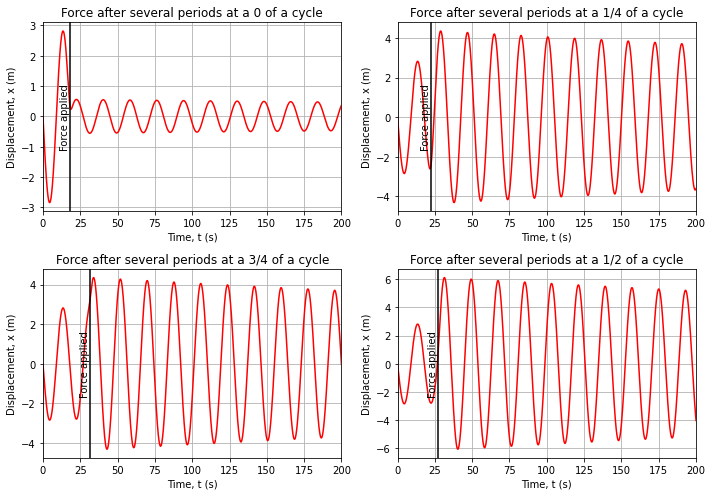

In [53]:
#Defines the start conditions

x_start = 0 #m
v_start = -1 #m/s
time = 200 #s
time_step = 0.01 #s
b = 0.01 #Kg/s

#Packs the start conditions into an aray

start_conditions = ([x_start, v_start, time, time_step, b])

#Defines the force and time of force.

force = 3 #N
time_period_of_force = 5 #s
    
force_plotter(force, time_period_of_force, start_conditions)

The application of a force over time has a greater effect on the oscillation than an instantaneous force as more energy is being inputted into the system causing the amplitudes to either increase or decrease more than in the previous system. When the force is applied at the start of the cycle, it is applied in the opposite direction to the velocity. Like before, the velocity decreases due to the force, however as it is applied for longer it causes the velocity to change direction and the oscillations start in the other direction. When the force is applied to the other parts of the cycle, similar effects are seen as for the instantaneous force, just with a larger increase in amplitude.

# Sinusoidal external force

Defines a function that will apply a constant oscillating force to the oscillation.

In [54]:
def oscillating_force(int_force, frequency, force_start_conditions, k=SPRING_CONSTANT, m=MASS):
    
    #Unpacks the start conditions.
    
    x_start, v_start, time_period, h, b = force_start_conditions
    
    #Defines the gamma factor and natural frequency
    
    gamma, natural_frequency = b /m, np.sqrt(k / m)
    
    #Creates an array of the force for an oscillating force.
    
    iterations = int(time_period / h)    
    t = np.linspace(0, time_period, iterations)
    
    #Defines the angular frequency and calculates the force for an oscillating force.

    w = 2 * np.pi * frequency # Hz    
    force = int_force * np.cos(w * t)
    
    #Packs the start conditions into an array containing the force array.
    
    force_start_conditions = x_start, v_start, time_period, h, b, force
    
    #Calculates the displacement and velocity for each time interval using Euler's method which is called using the 
    #function chooser.
    
    t, x, v = function_chooser(force_start_conditions, 3)
    
    #Returns the arrays containing the time steps, displacement and velocity.
    
    return t, x, v

Defines a function which plots the displacement over time for an oscillation which has a constant oscillating force being applied to it. To show the effects of frequency on the oscillation, four different frequencies have been plotted.

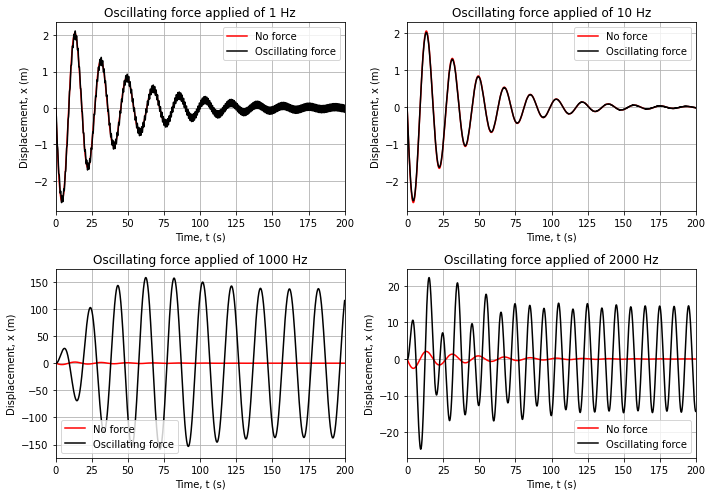

In [55]:
def oscillating_force_plotter(force, start_conditions):
    
    #Plots the displacement over time for Euler's method with an oscillating force is applied.
    
    fig = plt.figure(figsize=(10, 7))
    plot_array = fig.subplots(2, 2)
    
    freq = [1, 10, 2000, 1000]
    
    #Iterates the graph plotting for 4 subplots, each subplot contains
    
    for array_count, plots in enumerate(plot_array):
        
        for count, subplot in enumerate(plots):
            
            if array_count == 1 and count == 0:
                freq_count = 3
            else:
                freq_count = array_count+count
    
            func_time_forced, func_displacement_forced, func_velocity_forced = oscillating_force(int_force, freq[freq_count],
                                                                                                 start_conditions)
            func_time, func_displacement, func_velocity = function_chooser(start_conditions, 3)

            subplot.plot(func_time, func_displacement, 'r', label="No force")
            subplot.plot(func_time_forced, func_displacement_forced, 'k',
                                           label="Oscillating force")
            subplot.set_xlabel("Time, t (s)")
            subplot.set_ylabel("Displacement, x (m)")
            subplot.set_title("Oscillating force applied of "+str(freq[freq_count])+" Hz")
            subplot.legend()
            subplot.grid()
            subplot.set_xlim(0, start_conditions[2])
    
    plt.tight_layout()
    plt.show()
    
#Defines the start conditions
    
x_start = 0 #m
v_start = -1 #m/s
time = 200 #s
time_step = 0.01 #s
b = 0.25 #Kg/s

#Packs the start conditions into an array.
    
start_conditions = ([x_start, v_start, time, time_step, b])

int_force = 20 #N

oscillating_force_plotter(force, start_conditions)

The effects of lower frequencies not equal to the natural frequencies are very smaller on the oscillations as seen in the plots of 1 and 10 Hz, where the oscillations decay over time similar to a damped oscillated with no driving force. However, at larger frequencies it can be seen after a period, the transient period, the oscillations become steady and oscillate at a consistent frequency and amplitude. At this point, the oscillation of the system is determined by the driving force only compared before that when the motion shows a lot of variety before settling.

# Resonance Curve

Defines a function that will calculate the maximum amplitude for forced oscillations of frequencies above below and including the natural frequency.

In [56]:
def resonance(int_force, force_start_conditions, k=SPRING_CONSTANT, m=MASS):
    
    #Unpacks the start conditions.
    
    x_start, v_start, time_period, h, b = force_start_conditions
    
    #Defines the gamma factor and natural frequency.
    
    gamma, natural_frequency = b / m, np.sqrt(k / m)
    
    #Calcualtes the number of iterations the method needs to repeat for over that period and creates an array
    #containing increasing time steps.
    
    iterations = int(time_period / h)    
    t = np.linspace(0, time_period, iterations)
    
    #Creates empty arrays for the amplitude and angular frequency to be stored.
    
    amplitude = ([])
    angular_frequency = ([])
    
    #Calculates the angular frequency and amplitude for a range of frequencies above and below the natural frequency.
    
    for i in range(11):
        
        #Calculates the angular frequency
        
        w = natural_frequency * (1 + (i-5) / 10)
        angular_frequency = np.append(angular_frequency, w)
        
        #Calculates the amplitude of the oscillation for a forced oscillating of each angular frequency.
        
        force = int_force * np.cos(w * t)
        force_start_conditions = ([x_start, v_start, time, time_step, b, force])
        amplitude = np.append(amplitude, np.max([function_chooser(force_start_conditions, 3)[1]]))
        
    #Returns the arrays containing the angular_frequencies and the amplitudes.
        
    return angular_frequency, amplitude

Plots a resonance curve of the amplitude as a function of frequency.

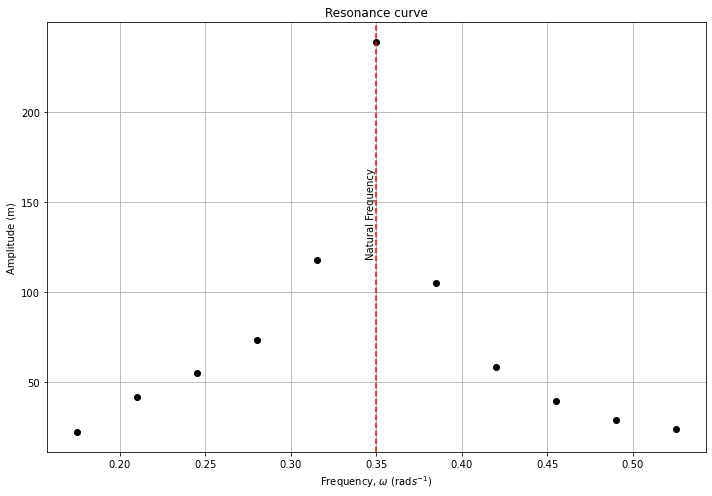

In [57]:
def resonace_curve_plotter(int_force, force_start_conditions, k=SPRING_CONSTANT, m=MASS):
    
    #Plots a graph of amplitude against frequency for a oscillating force being applied to an oscillator around the natural
    #frequency.
    
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111)
    
    angular_frequency, amplitude = resonance(int_force, force_start_conditions)
    
    ax.plot(angular_frequency, amplitude, 'ko')
    ax.set_title("Resonance curve")
    ax.set_xlabel(r"Frequency, $\omega$ (rad$s^{-1}$)")
    ax.set_ylabel("Amplitude (m)")
    ax.axvline(x=np.sqrt(k/m), color='r', ls='--')
    ax.text(np.sqrt(k/m), np.max(amplitude)/2, "Natural Frequency", rotation="vertical", horizontalalignment="right")
    ax.grid()
    
    plt.tight_layout()
    plt.show()
    
#Defines the start conditions.

x_start = 0 #m
v_start = -1 #m/s
time = 200 #s
time_step = 0.01 #s
b = 0.1 #Kg/s

int_force = 10 #N

#Packs the start conditions into an array.
    
start_conditions = ([x_start, v_start, time, time_step, b])

resonace_curve_plotter(int_force, start_conditions)

From the plot, it can be seen that the graph peaks at the natural frequency, rapidly decreasing further away from the natural frequency. This is due to resonance, when the driving frequency matches the natural frequency the system vibrates at the highest amplitude.